In [135]:
import numpy as np 
import pylab as pl 
import seaborn as sns
from gp_functions import *
import george
import os
import pandas as pd
import time
from ggplot import *
%matplotlib inline 


In [136]:
sns.set_style("darkgrid", {"axes.facecolor": ".92"})
sns.set_palette(sns.color_palette("husl"))

In [137]:
root = "../data/"
feature_root = '../features/'
allfiles = []
for path, subdirs, files in os.walk(root):
    #subdirs[:] = [d for d in subdirs if d not in ['GBI']]
    for filename in files:
        f = os.path.join(path, filename)
        allfiles.append(f)
    

In [234]:
allfiles


['../data/TDE/ASASSN-14li.txt',
 '../data/TDE/Swift1644.txt',
 '../data/SN/SN1988z.txt',
 '../data/SN/SN1980K.txt',
 '../data/SN/SN2004dk.txt',
 '../data/SN/SN1998bw.txt',
 '../data/SN/SN2008iz',
 '../data/SN/SN2008ax.txt',
 '../data/SN/SN2003bg.txt',
 '../data/SN/SN2004cc.txt',
 '../data/SN/SN1994I.txt',
 '../data/SN/SN2003L.txt',
 '../data/SN/SN2011dh.txt',
 '../data/SN/SN2004gq.txt',
 '../data/AGN/0528+134p',
 '../data/AGN/3C273',
 '../data/AGN/3C345',
 '../data/AGN/0458-020',
 '../data/AGN/CTA102',
 '../data/AGN/3C279',
 '../data/AGN/NGC4278.txt',
 '../data/AGN/0954+65',
 '../data/AGN/AO0235+164',
 '../data/AGN/3C120',
 '../data/AGN/PKS2004-447.txt',
 '../data/AGN/NRAO530',
 '../data/AGN/1803+784',
 '../data/AGN/B0605-085',
 '../data/AGN/2223-052',
 '../data/AGN/NGC7213',
 '../data/AGN/3C454.3',
 '../data/AGN/GBI/2005+403',
 '../data/AGN/GBI/0850-121',
 '../data/AGN/GBI/0336-019',
 '../data/AGN/GBI/0528+134',
 '../data/AGN/GBI/2200+420',
 '../data/AGN/GBI/1237+049',
 '../data/AGN/G

In [138]:
def get_t0(gp,x,y,err):
    sig = np.mean(err)
    
    t0 = -1
    while t0 == -1:
        xrand = np.random.uniform(np.min(x),np.max(x))
        ytest = gp.sample_conditional(y,xrand)[0]
        if ytest > sig: 
            t0 = xrand 
    return t0

def get_features(gp,x,y,err):
    sec = 1/(24*60*60)
    mins = 1/(24*60)
    hr = 1/24
    day = 1
    week = 7*day
    month = 30*day
    yr = 365*day

    delta_t = np.array([2*sec,1*mins,30*mins,1*hr,6*hr,12*hr,1*day,2*day,6*day,2*week,3*week,1*month,
                        2*month,4*month,6*month,8*month,1*yr,1.5*yr,2*yr])
    
    t0 = get_t0(gp,x,y,err)

    feature_ts = [ (t0 + dt) for dt in delta_t if (t0 + dt) < np.max(x)]
    feature_vec = gp.sample_conditional(y,feature_ts)

    pad_len = len(delta_t) - len(feature_vec)
    feature_vec = np.pad(feature_vec,(0,pad_len),'constant', constant_values=(-999,-999))
    
    return feature_vec


In [250]:
40 + (np.sum(np.char.count(allfiles, 'Magnetic-CV/'))*280)

600

In [254]:
for i in range(len(allfiles)):
    file = allfiles[i]
    
    if 'Magnetic-CV/' in file:
        x,y,err = loadfile(file)
        gp = get_gp(file) 

        for a in range(580):
            feature_vec = get_features(gp,x,y,err)
            with open(feature_root+file[8:]+'.txt','a+') as f:
                for feature in feature_vec:
                    f.write("%5.10f," %feature)
                f.write('\n')
            
        print(i,file)

ValueError: cannot reshape array of size 0 into shape (0)

In [257]:
feature_root = '../features/'
feature_files = []
for path, subdirs, files in os.walk(feature_root):
    #subdirs[:] = [d for d in subdirs if d not in ['GBI']]
    for filename in files:
        f = os.path.join(path, filename)
        feature_files.append(f)

In [258]:
sec = 1/(24*60*60)
mins = 1/(24*60)
hr = 1/24
day = 1
week = 7*day
month = 30*day
yr = 365*day

delta_t = np.array([2*sec,1*mins,30*mins,1*hr,6*hr,12*hr,1*day,2*day,6*day,2*week,3*week,1*month,
                        2*month,4*month,6*month,8*month,1*yr,1.5*yr,2*yr])
    

In [298]:

feat_cols = ['2sec','1min','30min','1hr','6hr','12hr','1day','2day','6day','2week','3week',
             '1month','2month','4month','6month','8month','1yr','1.5yr','2yr']

df = pd.DataFrame(columns=feat_cols)

metaclass = 'no'

for i in range(len(feature_files)):
    feat_file = feature_files[i]
    df_from_each_file = pd.read_csv(feat_file,sep = ',',names=feat_cols,usecols=np.arange(len(feat_cols)))

    if metaclass == 'yes':
        if 'TDE' in feat_file:
            df_from_each_file['type'] = 'TDE'
            print(feat_file)
        elif 'SN/' in feat_file:
            df_from_each_file['type'] = 'SN'        
        elif 'AGN' in feat_file:
            df_from_each_file['type'] = 'AGN'
        elif 'XRB' in feat_file:
            df_from_each_file['type'] = 'XRB'
        elif 'GRB' in feat_file:
            df_from_each_file['type'] = 'GRB'
        elif 'Nova' in feat_file:
            df_from_each_file['type'] = 'Nova'        
        elif 'RSCVn' in feat_file:
            df_from_each_file['type'] = 'RSCVn'
        elif 'Magnetar' in feat_file:
            df_from_each_file['type'] = 'Magnetar'
        elif 'Flare-Star' in feat_file:
            df_from_each_file['type'] = 'FS'
        elif 'Magnetic-CV' in feat_file:
            df_from_each_file['type'] = 'MCV'
        elif 'Algol' in feat_file:
            df_from_each_file['type'] = 'Algol'
    
    if metaclass == 'no':
        if 'SN/' in feat_file:
            df_from_each_file['type'] = 'SN'        
        elif 'AGN' in feat_file:
            df_from_each_file['type'] = 'AGN'
        elif 'XRB' in feat_file:
            df_from_each_file['type'] = 'XRB'
        elif 'GRB' in feat_file:
            df_from_each_file['type'] = 'GRB'
        elif 'Nova' in feat_file:
            df_from_each_file['type'] = 'Nova'        
        elif 'Flare-Star' in feat_file:
            df_from_each_file['type'] = 'FS'
        elif 'Magnetic-CV' in feat_file:
            df_from_each_file['type'] = 'binary'
        elif 'RSCVn' in feat_file:
            df_from_each_file['type'] = 'binary'
        elif 'Algol' in feat_file:
            df_from_each_file['type'] = 'binary'
            
    df = df.append(df_from_each_file)
        

df = df[feat_cols + ['type']]

df['type'].value_counts()

binary    1780
GRB        600
AGN        600
FS         600
SN         600
XRB        600
Nova       595
Name: type, dtype: int64

In [299]:
feat_array_TDE = df.loc[(df["type"] == "TDE" )]
feat_array_SN = df.loc[(df["type"] == "SN" )]
feat_array_AGN = df.loc[(df["type"] == "AGN" )]
feat_array_XRB = df.loc[(df["type"] == "XRB" )]
feat_array_GRB = df.loc[(df["type"] == "GRB" )]
feat_array_Nova = df.loc[(df["type"] == "Nova" )]
feat_array_RSCVn = df.loc[(df["type"] == "RSCVn" )]
feat_array_Magnetar = df.loc[(df["type"] == "Magnetar" )]
feat_array_FS = df.loc[(df["type"] == "FS" )]
feat_array_MCV = df.loc[(df["type"] == "MCV" )]
feat_array_Algol = df.loc[(df["type"] == "Algol" )]

feat_dfs = [feat_array_TDE,feat_array_SN,feat_array_AGN,feat_array_XRB,feat_array_GRB,feat_array_Nova,
               feat_array_RSCVn,feat_array_Magnetar,feat_array_FS,feat_array_MCV,feat_array_Algol]

array_names = ['TDE','SN','AGN','XRB','GRB','Nova','RSCVn','Magnetar','FS','MCV','Algol']
dfnew = pd.DataFrame(columns=feat_cols + ['type'])

for d in feat_dfs: 
    d = d.fillna(d.mean())
    dfnew = dfnew.append(d)


In [300]:
dfnew[feat_cols].values

array([[  1.98329220e-02,   1.98328054e-02,   1.98292933e-02, ...,
          6.07001430e-03,  -9.99000000e+02,  -9.99000000e+02],
       [  3.17780290e-02,   3.17779959e-02,   3.17770130e-02, ...,
          1.03640777e-02,   8.46382270e-03,  -9.99000000e+02],
       [  3.26881565e-02,   3.26881026e-02,   3.26864734e-02, ...,
          1.00772728e-02,   1.22151684e-02,  -9.99000000e+02],
       ..., 
       [  2.99113200e-04,   3.01963400e-04,   3.60903900e-04, ...,
         -9.99000000e+02,  -9.99000000e+02,  -9.99000000e+02],
       [  8.63320600e-04,   8.58625900e-04,   6.36379100e-04, ...,
         -9.99000000e+02,  -9.99000000e+02,  -9.99000000e+02],
       [  5.25015800e-04,   5.21895900e-04,   3.73658400e-04, ...,
         -9.99000000e+02,  -9.99000000e+02,  -9.99000000e+02]])

In [345]:
dfnew = dfnew.fillna(dfnew.mean())

from sklearn.manifold import TSNE
from sklearn import preprocessing

training_set = dfnew[feat_cols].values

scaler = preprocessing.StandardScaler().fit(training_set)
n_sne = 10000

time_start = time.time()
tsne = TSNE(n_components=2,init='pca',verbose=2, perplexity=50)

tsne_results = tsne.fit_transform(scaler.transform(training_set))


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3595
[t-SNE] Computed conditional probabilities for sample 2000 / 3595
[t-SNE] Computed conditional probabilities for sample 3000 / 3595
[t-SNE] Computed conditional probabilities for sample 3595 / 3595
[t-SNE] Mean sigma: 0.000029
[t-SNE] Iteration 25: error = 1.1505326, gradient norm = 0.0044154
[t-SNE] Iteration 50: error = 1.0623953, gradient norm = 0.0036567
[t-SNE] Iteration 75: error = 0.7630789, gradient norm = 0.0019388
[t-SNE] Iteration 100: error = 0.7014369, gradient norm = 0.0017266
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.701437
[t-SNE] Iteration 125: error = 0.5996692, gradient norm = 0.0014063
[t-SNE] Iteration 150: error = 0.5686906, gradient norm = 0.0013348
[t-SNE] Iteration 175: error = 0.5608832, gradient norm = 0.0013190
[t-SNE] Iteration 200: error = 0.5587878, gradient norm = 0.0013143
[t-SNE

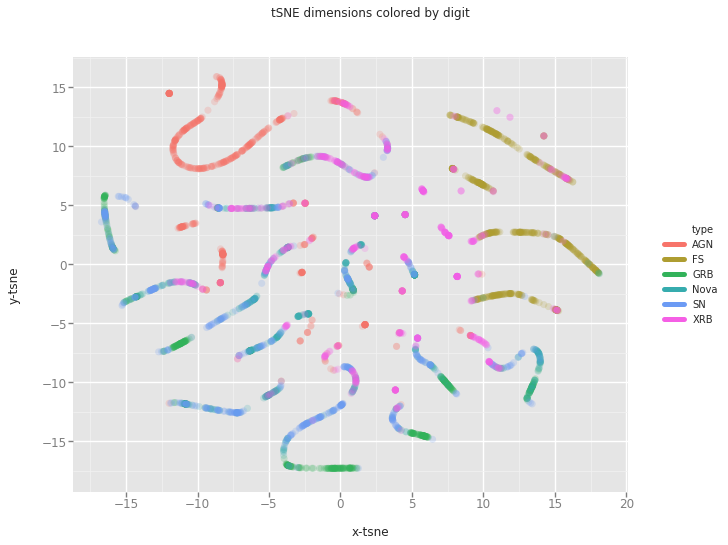

<ggplot: (8732555596236)>

In [346]:
df_tsne = dfnew.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='type') ) \
        + geom_point(size=50,alpha=0.2) \
        + ggtitle("tSNE dimensions colored by digit")
chart